# Task 4.10 Part 1 Further Analysis

This script contains the following points:

    01. Improting Libraries
    02. Importing CSV/PKL files
    03. Work for Task Part 1
    04. Exporting files and visuals  

## 01. Importing Libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing CSV/PKL files

In [3]:
# Identifying pathway for import for ease with multiple imports
path = r'C:\Users\simpe\Instacart Basket Analysis'

In [4]:
# Importing orders_products__customers_merged.pkl
df_complete = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

## 03. Work for task part 1

### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
df_complete.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Spender_type,Median_days_since_prior_order,Customer_frequency,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423


### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

### 1) Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
    
### 2) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by     crossing the variable you just created with the spending flag.)


Starting the process for creating the regions by making a list that divides in to regions based on the Wikipedia link.

In [6]:
result = []

for value in df_complete["state"]:
  if (value == 'Maine') or ( value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
    result.append("Region 1, Northeast")
  elif (value =='Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value =='Nebraska') or (value =='Kansas') or (value =='Minnesota') or (value =='Iowa') or (value =='Missouri'):
    result.append("Region 2, Midwest")
  elif (value =='Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value =='Virginia') or (value =='West Virginia') or (value =='North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value =='Florida') or (value =='Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):  
    result.append("Region 3, South")  
  elif (value =='Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value =='Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
    result.append("Region 4, West")
  else:
    result.append("Not Part of USA")

In [7]:
#viewing what was produced
result

['Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',
 'Region 3, South',


In [8]:
# creating new column to store Region information in dataframe
df_complete['Region'] = result

In [9]:
# checking information
df_complete['Region'].value_counts(dropna = False)

Region
Region 3, South        10791885
Region 4, West          8292913
Region 2, Midwest       7597325
Region 1, Northeast     5722736
Name: count, dtype: int64

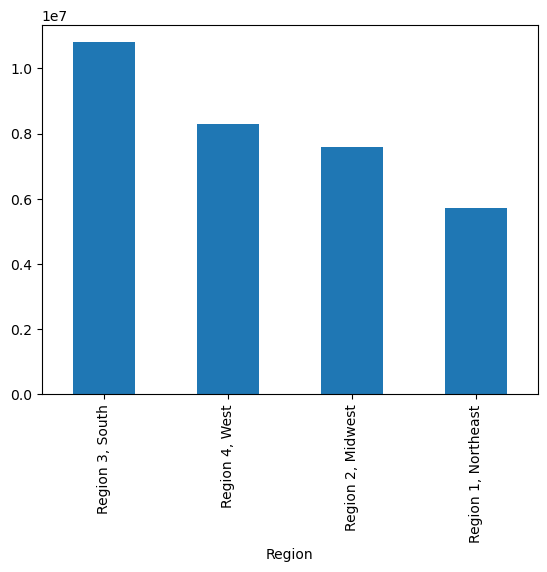

In [10]:
bar16 = df_complete['Region'].value_counts().plot.bar()

In [11]:
# Creating crosstab between Regions and Spender_Type
crosstab = pd.crosstab(df_complete['Region'], df_complete['Spender_type'], dropna = False)

In [12]:
crosstab

Spender_type,High_spender,Low_spender
Region,,
"Region 1, Northeast",108225,5614511
"Region 2, Midwest",155975,7441350
"Region 3, South",209691,10582194
"Region 4, West",160354,8132559


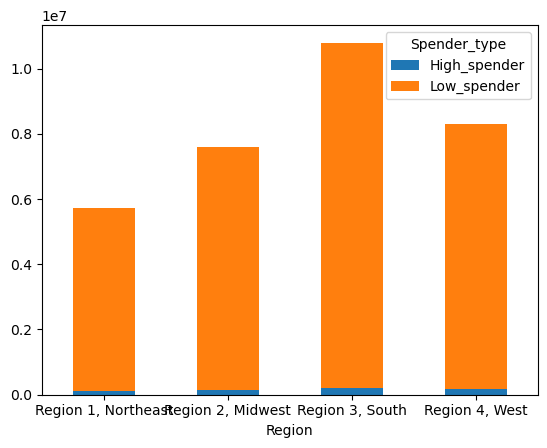

In [13]:
#plotting bar chart
spender_type_vs_region= crosstab.plot(kind="bar", stacked=True, rot=0)

In [14]:
# Creating crosstab between Regions and frequency flag
crosstab7 = pd.crosstab(df_complete['Region'], df_complete['Customer_frequency'], dropna = False)

In [15]:
#Viewing work
crosstab7

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer,NaN
Region,,,,
"Region 1, Northeast",3804566,630182,1287988,0
"Region 2, Midwest",5017709,863419,1716197,0
"Region 3, South",7192372,1215088,2384420,5
"Region 4, West",5545206,927748,1819959,0


In [16]:
#creating a crosstabto show percentages
crosstab8 = pd.crosstab(df_complete['Region'], df_complete['Customer_frequency'], normalize='index')\
       .round(4)*100

In [17]:
#viewing work
crosstab8

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer
Region,,,
"Region 1, Northeast",66.48,11.01,22.51
"Region 2, Midwest",66.05,11.36,22.59
"Region 3, South",66.65,11.26,22.09
"Region 4, West",66.87,11.19,21.95


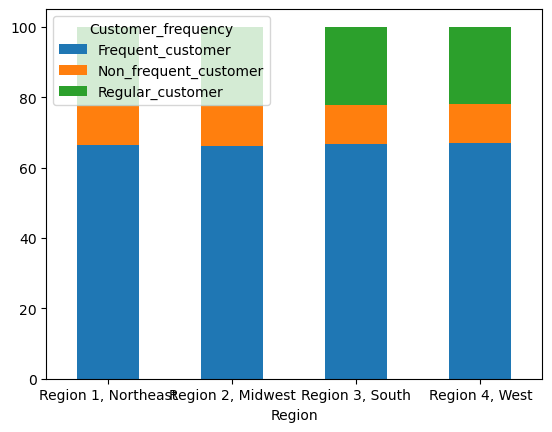

In [18]:
#plotting bar chart (stacked)
regionvsfreq= crosstab8.plot(kind="bar", stacked=True, rot=0)

In [19]:
#checking counts on spender type
df_complete['Spender_type'].value_counts(dropna = False)

Spender_type
Low_spender     31770614
High_spender      634245
Name: count, dtype: int64

In general the high spenders are an order of magnitude lower than the low-spenders. The South region has by far the highest amount of low spenders.

In [20]:
print(df_complete.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'Mean_prices',
       'Spender_type', 'Median_days_since_prior_order', 'Customer_frequency',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependents',
       'marital_status', 'income', 'Region'],
      dtype='object')


### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
# categorizing using loc (max_order <= 4)
df_complete.loc[(df_complete['max_order'] <= 4 ) , 'low_activity_flag'] = 'Low activity customer'

In [22]:
# categorizing using loc (max_order >= 5)
df_complete.loc[(df_complete['max_order'] >= 5 ) , 'low_activity_flag'] = 'Normal activity customer'

In [23]:
#checking categorization counts
df_complete['low_activity_flag'].value_counts(dropna = False)

low_activity_flag
Normal activity customer    30964564
Low activity customer        1440295
Name: count, dtype: int64

In [24]:
# Creating exclusion subset
df_complete_Normal_activity_cust =  df_complete[df_complete['low_activity_flag']=='Normal activity customer']

In [25]:
#checking categorization counts
df_complete_Normal_activity_cust ['low_activity_flag'].value_counts(dropna = False)

low_activity_flag
Normal activity customer    30964564
Name: count, dtype: int64

In [26]:
# Exporting this subset as a PKL file
df_complete_Normal_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Normal_activity_customer_subset.pkl'))

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [27]:
# dividing customers into age groups, Age range 18-35 = Young Adult, Age range 35-64 = Adult, Age range greater than 64 = Senior, to to divide ages of customers
df_complete.loc[(df_complete['age'] >= 18) & (df_complete['age'] <= 35), 'Age_Range'] = 'Young Adult'
df_complete.loc[(df_complete['age'] > 35) & (df_complete['age'] <= 64), 'Age_Range'] = 'Adult'
df_complete.loc[(df_complete['age'] > 64), 'Age_Range'] = 'Seniors'
df_complete['Age_Range'].value_counts()   
 

Age_Range
Adult          14683356
Young Adult     9146419
Seniors         8575084
Name: count, dtype: int64

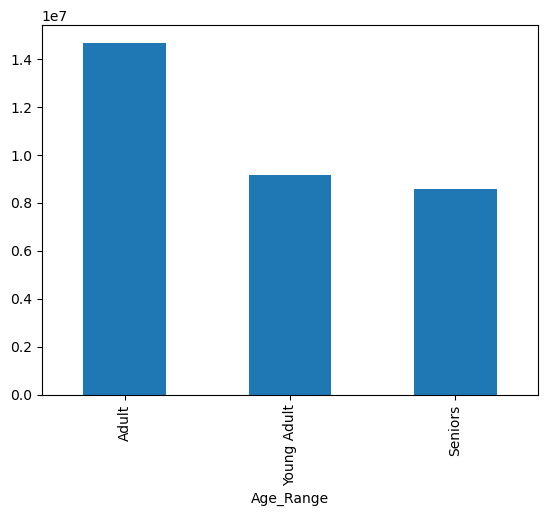

In [28]:
# Bar chart to show Age range division
bar20 = df_complete['Age_Range'].value_counts().plot.bar()

As shown above, the 18-35 age bracket has the highest customer count.

In [29]:
#Creating a crosstab to show the divisions in all age range categories across the regional divisions in the USA 
crosstab20 = pd.crosstab(df_complete['Age_Range'], df_complete['Region'], dropna = False)

In [30]:
#Looking at the crosstab
crosstab20

Region,"Region 1, Northeast","Region 2, Midwest","Region 3, South","Region 4, West"
Age_Range,,,,
Adult,2545530,3491746,4868567,3777513
Seniors,1553903,1990844,2836257,2194080
Young Adult,1623303,2114735,3087061,2321320


In [31]:
# Doing the same with percentages
crosstab21 = pd.crosstab(df_complete['Region'], df_complete['Age_Range'], normalize='index')\
       .round(4)*100

In [32]:
crosstab21

Age_Range,Adult,Seniors,Young Adult
Region,,,
"Region 1, Northeast",44.48,27.15,28.37
"Region 2, Midwest",45.96,26.20,27.84
"Region 3, South",45.11,26.28,28.61
"Region 4, West",45.55,26.46,27.99


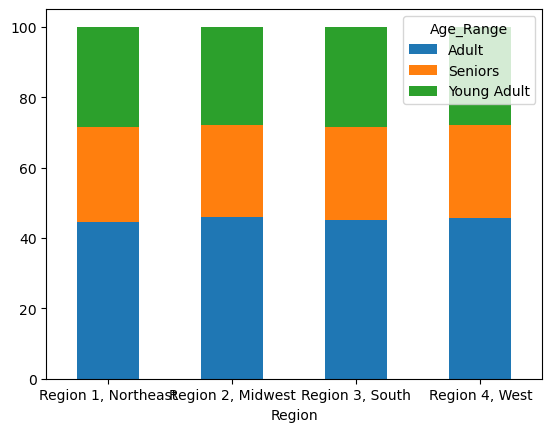

In [33]:
#plotting bar chart (stacked)
regionsvsagerange= crosstab21.plot(kind="bar", stacked=True, rot=0)

In [34]:
# Dividing time of day into its own categories; 12:00 am - 05:59 am = overnight, 06:00 - 11:59 morning, 12:00 pm - 04:59 pm = afternoon, 05:00 pm - 07:59 pm = evening,08:00 pm - 11:59 pm = night  
       
df_complete.loc[(df_complete['order_hour_of_day'] > 0) & (df_complete['order_hour_of_day'] < 6), 'time_of_day'] = 'overnight'
df_complete.loc[(df_complete['order_hour_of_day'] >= 6) & (df_complete['order_hour_of_day'] < 12), 'time_of_day'] = 'morning'
df_complete.loc[(df_complete['order_hour_of_day'] >= 12) & (df_complete['order_hour_of_day'] < 17), 'time_of_day'] = 'afternoon'
df_complete.loc[(df_complete['order_hour_of_day'] >= 17) & (df_complete['order_hour_of_day'] < 20), 'time_of_day'] = 'evening'
df_complete.loc[(df_complete['order_hour_of_day'] >= 20) & (df_complete['order_hour_of_day'] < 24), 'time_of_day'] = 'night'
df_complete['time_of_day'].value_counts()

time_of_day
afternoon    13165968
morning      10851768
evening       4982461
night         2808334
overnight      377559
Name: count, dtype: int64

In [35]:
# Creating subsets of Age Range
df_Young_adults =  df_complete[df_complete['Age_Range']=='Young Adult']
df_Adults =  df_complete[df_complete['Age_Range']=='Adult']
df_Seniors =  df_complete[df_complete['Age_Range']=='Seniors']

### Create an appropriate visualization to show the distribution of profiles.

In [36]:
df_Young_adults.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9146419 entries, 0 to 32403829
Data columns (total 37 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        object  
 2   eval_set                       object  
 3   order_number                   int64   
 4   order_dow                      int64   
 5   order_hour_of_day              int64   
 6   days_since_prior_order         float64 
 7   product_id                     int64   
 8   add_to_cart_order              int64   
 9   reordered                      int64   
 10  _merge                         category
 11  Unnamed: 0                     int64   
 12  product_name                   object  
 13  aisle_id                       int8    
 14  department_id                  int8    
 15  prices                         float16 
 16  price_range_loc                object  
 17  busiest_day                    

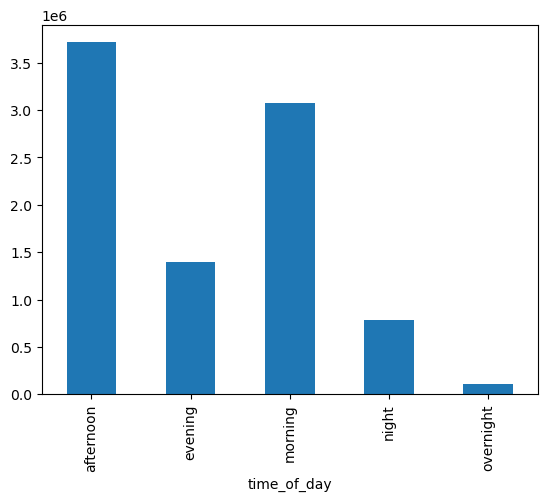

In [37]:
# creating bar chart of time of day in young adult category
bar1 = df_Young_adults['time_of_day'].value_counts().sort_index().plot.bar()

Young Adults place most of their orders in the morning and afternoon.

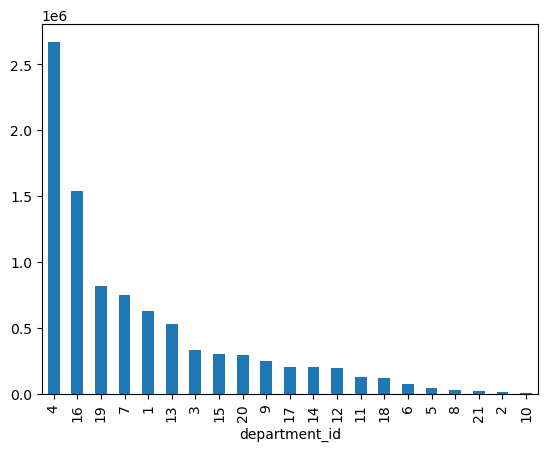

In [38]:
# creating bar chart of dep id in young adult category
bar2 = df_Young_adults['department_id'].value_counts().plot.bar()

Young adults order mostly from departments 4 and 16.

Young adults are mostly in the middle class income category

In [39]:
# Marking the above prices above 100 as missing
df_Young_adults.loc[df_Young_adults['prices'] >100, 'prices'] = np.nan

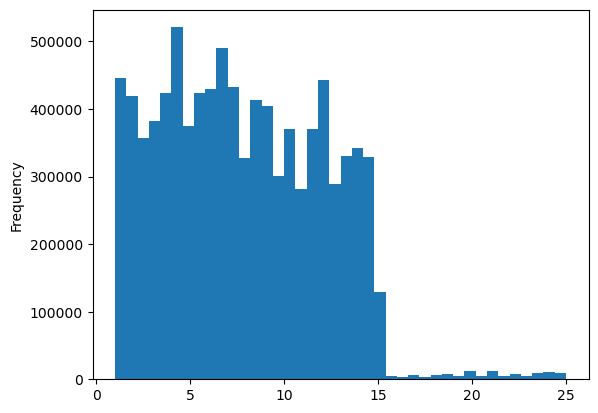

In [40]:
# Histogram young adult prices
hist1 = df_Young_adults['prices'].plot.hist(bins = 40)

Young adults tend to spend less than $15 per order

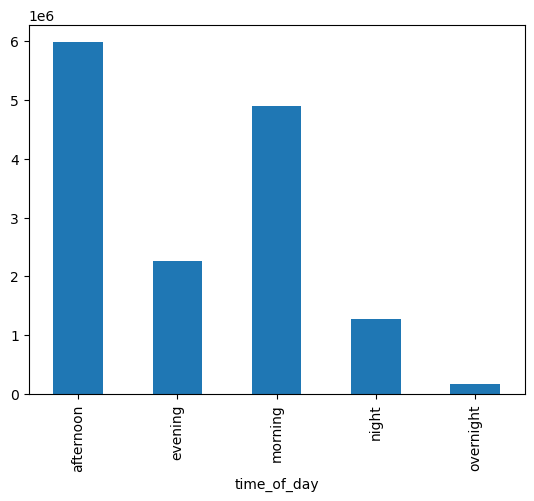

In [41]:
# creating bar chart of time of day in adult category
bar4 = df_Adults['time_of_day'].value_counts().sort_index().plot.bar()

Adults order mostly in the morning and afternoon

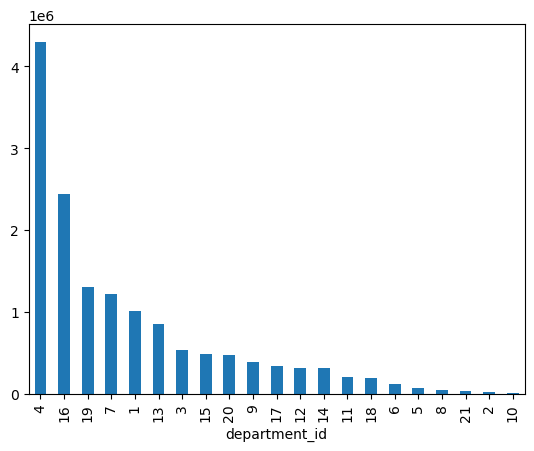

In [42]:
# creating bar chart of time of day in the adult category
bar5 = df_Adults['department_id'].value_counts().plot.bar()

Adults order mostly from departments 4 and 16.

In [43]:
# Marking the above prices above 100 as missing
df_Adults.loc[df_Adults['prices'] >100, 'prices'] = np.nan

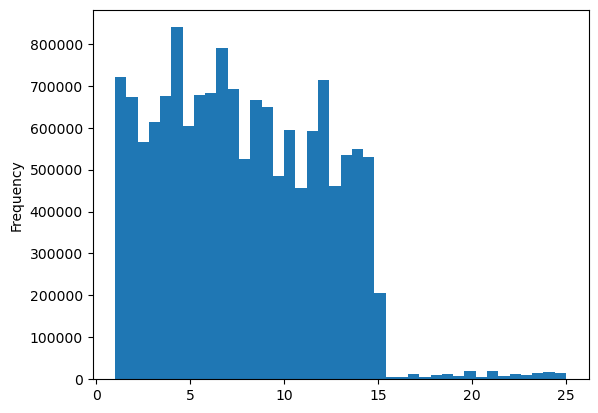

In [44]:
# histogram on what adults spend
hist2 = df_Adults['prices'].plot.hist(bins = 40)

Adults tend to spend less than 15 dollars per order.

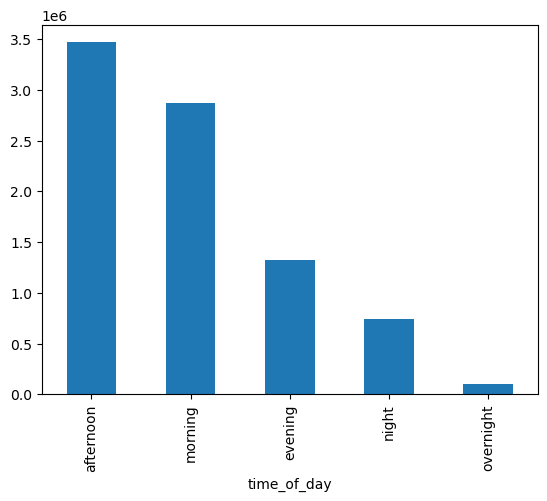

In [45]:
# creating bar chart of time of day in the senior category
bar7 = df_Seniors['time_of_day'].value_counts().plot.bar()

Seniors shop mostly in the morning and afternoon

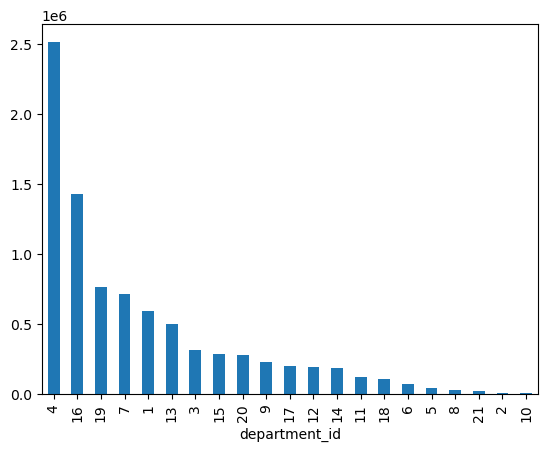

In [46]:
# creating bar chart of department id in the senior category
bar8 = df_Seniors['department_id'].value_counts().plot.bar()

Seniors order mostly from departments 4 and 16

In [47]:
# Marking the above prices above 100 as missing
df_Seniors.loc[df_Seniors['prices'] >100, 'prices'] = np.nan

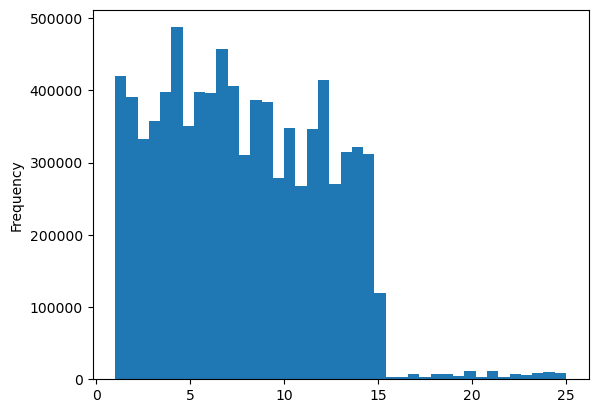

In [48]:
# histogram on what Seniors spend
hist3 = df_Seniors['prices'].plot.hist(bins = 40)

Seniors also tend to spend less than $15 per order.

In [49]:
# Looking at the overall department ID data

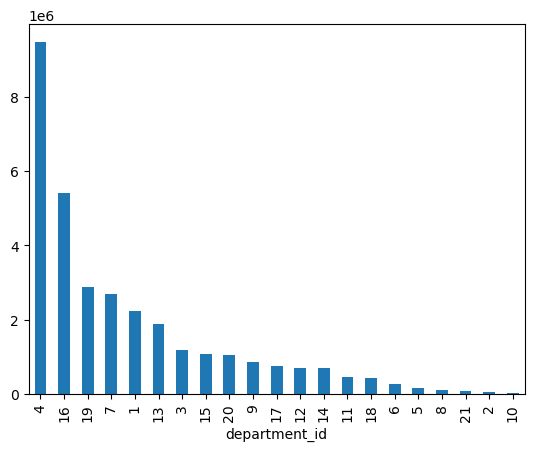

In [50]:
bar14 = df_complete['department_id'].value_counts().plot.bar()

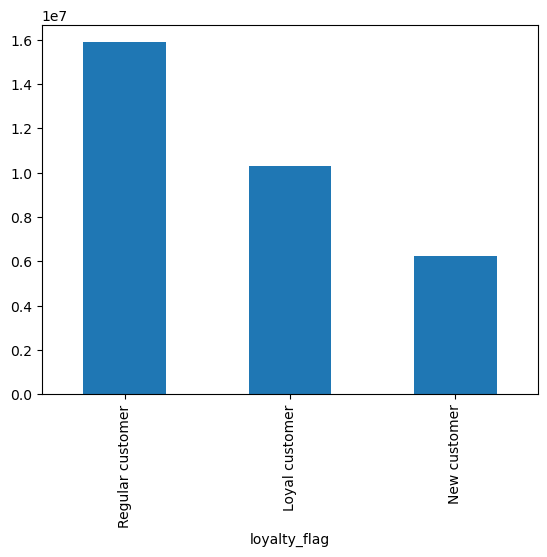

In [51]:
#Customer loyalty distribution
bar15 = df_complete['loyalty_flag'].value_counts().plot.bar()

In [52]:
#Showing counts of each category
df_complete['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [53]:
#calculating percentages of each category based on customer count
print('Regular Customer', round((15877395/(15877395+10284396+6244250))*100, 2),'%')
print('Loyal Customer ', round((10284396/(15877395+10284396+6244250))*100, 2),'%')
print('New Customer ', round((6244250/(15877395+10284396+6244250))*100, 2),'%')

Regular Customer 49.0 %
Loyal Customer  31.74 %
New Customer  19.27 %


In [54]:
#looking at customer frequency column counts 
df_complete['Customer_frequency'].value_counts()

Customer_frequency
Frequent_customer        21559853
Regular_customer          7208564
Non_frequent_customer     3636437
Name: count, dtype: int64

In [55]:
# Creating crosstab between loyalty flag and customer frequency
crosstab4 = pd.crosstab(df_complete['loyalty_flag'], df_complete['Customer_frequency'], dropna = False)

In [56]:
#showing crosstab
crosstab4

Customer_frequency,Frequent_customer,Non_frequent_customer,Regular_customer,NaN
loyalty_flag,,,,
Loyal customer,10279960,0,4133,0
New customer,1648671,2724962,1870352,5
Regular customer,9631222,911475,5334079,0


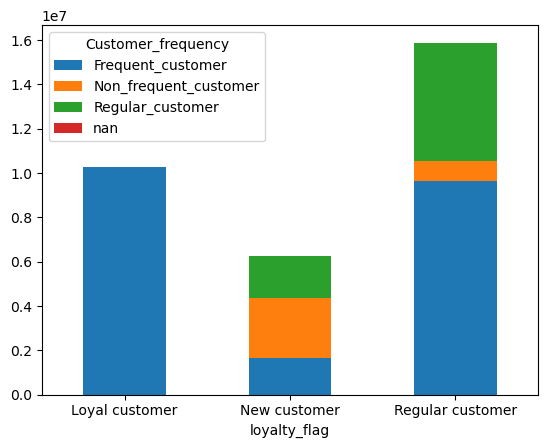

In [57]:
#plotting bar chart
loyalvsfreq= crosstab4.plot(kind="bar", stacked=True, rot=0)

In [58]:
#### viewing percentage of customers in each region based on class
print('Loyal:Frequent ', round(crosstab4.iloc[0,0]/10284396*100, 2),'%')
print('Loyal:Non Frequent ', round(crosstab4.iloc[0,1]/10284396*100, 2),'%')
print('Loyal:Regular ', round(crosstab4.iloc[0,2]/10284396*100, 2),'%')
print('New:Frequent ', round(crosstab4.iloc[1,0]/6244245*100, 2),'%')
print('New:Non Frequent ', round(crosstab4.iloc[1,1]/6244245*100, 2),'%')
print('New:Regular ', round(crosstab4.iloc[1,2]/6244245*100, 2),'%')
print('Regular:Frequent ', round(crosstab4.iloc[2,0]/15877395*100, 2),'%')
print('Regular:Non frequent ', round(crosstab4.iloc[2,1]/15877395*100, 2),'%')
print('Regular:Regular ', round(crosstab4.iloc[2,2]/15877395*100, 2),'%')


Loyal:Frequent  99.96 %
Loyal:Non Frequent  0.0 %
Loyal:Regular  0.04 %
New:Frequent  26.4 %
New:Non Frequent  43.64 %
New:Regular  29.95 %
Regular:Frequent  60.66 %
Regular:Non frequent  5.74 %
Regular:Regular  33.6 %


In [59]:
# Creating crosstab between loyalty flag and customer frequency
crosstab5 = pd.crosstab(df_complete['loyalty_flag'], df_complete['department_id'], normalize='index')\
       .round(4)*100

In [60]:
#showing crosstab
with pd.option_context("display.max_columns", None):
    display(crosstab5)


department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,5.93,0.10,3.69,30.60,0.38,0.76,8.31,0.25,2.36,0.13,1.20,1.97,5.45,2.15,2.86,17.80,1.91,1.62,9.17,3.15,0.18
New customer,7.77,0.12,3.58,27.81,0.60,0.91,8.21,0.33,3.03,0.08,1.58,2.35,6.28,2.22,3.78,15.56,2.67,0.96,8.56,3.30,0.27
Regular customer,7.18,0.11,3.58,28.94,0.49,0.84,8.32,0.33,2.74,0.10,1.42,2.27,5.81,2.16,3.38,16.35,2.36,1.24,8.88,3.28,0.21


In [61]:
#showing the 3 dataframes created
df_Young_adults.describe()

C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\simpe\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,Mean_prices,Median_days_since_prior_order,age,number_of_dependents,income
count,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,8.560115e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.144942e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06
mean,1.711323e+06,1.710673e+01,2.730554e+00,1.340504e+01,1.112486e+01,2.558515e+04,8.408846e+00,5.895940e-01,2.558686e+04,6.446255e+01,9.936948e+00,NaN,3.298262e+01,1.212518e+01,1.041369e+01,2.650352e+01,1.504931e+00,7.049027e+04
std,9.875047e+05,1.747881e+01,2.088960e+00,4.248005e+00,8.771316e+00,1.407753e+04,7.187291e+00,4.919074e-01,1.407908e+04,4.849274e+01,6.284211e+00,0.000000e+00,2.508263e+01,9.380971e+01,7.117398e+00,5.192528e+00,1.118032e+00,2.521301e+04
min,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.591100e+04
25%,8.564610e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.356000e+04,3.000000e+00,0.000000e+00,1.356000e+04,2.400000e+01,4.000000e+00,4.199219e+00,1.300000e+01,7.386010e+00,6.000000e+00,2.200000e+01,1.000000e+00,5.593500e+04
50%,1.710364e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.524600e+04,6.000000e+00,1.000000e+00,2.524700e+04,7.900000e+01,9.000000e+00,7.398438e+00,2.600000e+01,7.817197e+00,8.000000e+00,2.700000e+01,2.000000e+00,6.903400e+04
75%,2.566488e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.791700e+04,1.200000e+01,1.000000e+00,3.792100e+04,1.000000e+02,1.600000e+01,1.120312e+01,4.700000e+01,8.245455e+00,1.300000e+01,3.100000e+01,3.000000e+00,8.463100e+04
max,3.421077e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.090000e+02,1.000000e+00,4.969200e+04,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.250693e+04,3.000000e+01,3.500000e+01,3.000000e+00,3.963640e+05


In [62]:
df_Adults.describe()

C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\simpe\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,Mean_prices,Median_days_since_prior_order,age,number_of_dependents,income
count,1.468336e+07,1.468336e+07,1.468336e+07,1.468336e+07,1.374370e+07,1.468336e+07,1.468336e+07,1.468336e+07,1.468336e+07,1.468336e+07,1.468336e+07,1.468104e+07,1.468336e+07,1.468336e+07,1.468335e+07,1.468336e+07,1.468336e+07,1.468336e+07
mean,1.710712e+06,1.719019e+01,2.740414e+00,1.343687e+01,1.110599e+01,2.560994e+04,8.348983e+00,5.900650e-01,2.561165e+04,6.450160e+01,9.917058e+00,NaN,3.314732e+01,1.201337e+01,1.040843e+01,4.998811e+01,1.496487e+00,1.080371e+05
std,9.870743e+05,1.758857e+01,2.089629e+00,4.242437e+00,8.788329e+00,1.408606e+04,7.144093e+00,4.918214e-01,1.408761e+04,4.841457e+01,6.281339e+00,0.000000e+00,2.521191e+01,8.148315e+01,7.148063e+00,8.338073e+00,1.121270e+00,4.373052e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.600000e+01,0.000000e+00,2.590300e+04
25%,8.563810e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.355400e+04,3.000000e+00,0.000000e+00,1.355400e+04,2.400000e+01,4.000000e+00,4.199219e+00,1.300000e+01,7.384178e+00,6.000000e+00,4.300000e+01,0.000000e+00,7.775900e+04
50%,1.711835e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.534000e+04,6.000000e+00,1.000000e+00,2.534100e+04,7.900000e+01,9.000000e+00,7.398438e+00,2.600000e+01,7.825314e+00,8.000000e+00,5.000000e+01,1.000000e+00,1.078480e+05
75%,2.565056e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.797300e+04,1.100000e+01,1.000000e+00,3.797700e+04,1.000000e+02,1.600000e+01,1.129688e+01,4.800000e+01,8.254801e+00,1.300000e+01,5.700000e+01,3.000000e+00,1.375860e+05
max,3.421081e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01,6.400000e+01,3.000000e+00,5.924090e+05


In [63]:
df_Seniors.describe()

C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\simpe\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\simpe\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,Mean_prices,Median_days_since_prior_order,age,number_of_dependents,income
count,8.575084e+06,8.575084e+06,8.575084e+06,8.575084e+06,8.024945e+06,8.575084e+06,8.575084e+06,8.575084e+06,8.575084e+06,8.575084e+06,8.575084e+06,8.573751e+06,8.575084e+06,8.575084e+06,8.575084e+06,8.575084e+06,8.575084e+06,8.575084e+06
mean,1.710186e+06,1.709824e+01,2.745084e+00,1.342652e+01,1.107864e+01,2.559375e+04,8.298598e+00,5.887620e-01,2.559546e+04,6.450363e+01,9.906174e+00,NaN,3.296341e+01,1.176885e+01,1.036250e+01,7.306163e+01,1.507920e+00,1.155889e+05
std,9.874633e+05,1.750395e+01,2.092006e+00,4.251315e+00,8.771382e+00,1.408734e+04,7.032313e+00,4.920583e-01,1.408889e+04,4.842026e+01,6.278786e+00,0.000000e+00,2.513488e+01,7.368684e+01,7.118962e+00,4.888686e+00,1.115584e+00,4.209520e+04
min,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,6.500000e+01,0.000000e+00,2.900100e+04
25%,8.544700e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,1.353500e+04,2.400000e+01,4.000000e+00,4.199219e+00,1.300000e+01,7.393333e+00,6.000000e+00,6.900000e+01,1.000000e+00,9.540600e+04
50%,1.710561e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.527200e+04,6.000000e+00,1.000000e+00,2.527300e+04,7.900000e+01,9.000000e+00,7.398438e+00,2.600000e+01,7.830374e+00,8.000000e+00,7.300000e+01,2.000000e+00,1.160590e+05
75%,2.565092e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,3.795100e+04,1.000000e+02,1.600000e+01,1.129688e+01,4.700000e+01,8.262373e+00,1.300000e+01,7.700000e+01,3.000000e+00,1.431900e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,9.900000e+01,1.000000e+00,4.969200e+04,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.404251e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In general age group to age group comparisons tend to show little to no differnece in when they shop, what departments they order from, thier income category, and how much they spend.

In [64]:
# creating a new dataframe that summarizes the data by region
df_region = df_complete[['Region', 'user_id', 'order_id']].groupby(['Region']).agg({'user_id': pd.Series.nunique, 'order_id' : pd.Series.nunique}) 

In [65]:
# Checking work
df_region

,user_id,order_id
Region,,
"Region 1, Northeast",36388,567162
"Region 2, Midwest",48519,754275
"Region 3, South",68737,1071562
"Region 4, West",52565,821686


In [66]:
# renaming columns
df_region = df_region.rename(columns={'user_id':'customer_count', 'order_id':'orders_placed'})

In [67]:
# Checking work
df_region

,customer_count,orders_placed
Region,,
"Region 1, Northeast",36388,567162
"Region 2, Midwest",48519,754275
"Region 3, South",68737,1071562
"Region 4, West",52565,821686


In [68]:
# creating new column: average orders placed by customer
df_region['avg_orders_per_customer'] = df_region['orders_placed']/df_region['customer_count']

In [69]:
# Checking work
df_region

,customer_count,orders_placed,avg_orders_per_customer
Region,,,
"Region 1, Northeast",36388,567162,15.586512
"Region 2, Midwest",48519,754275,15.545972
"Region 3, South",68737,1071562,15.589304
"Region 4, West",52565,821686,15.631808


### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

The division of wealth is pretty even across the regions in the USA for the customer base

Again we see very similar time of day orders across all regions

In [70]:
# Creating subsets by USA region
df_Northeast =  df_complete[df_complete['Region']=='Region 1, Northeast']
df_Midwest =  df_complete[df_complete['Region']=='Region 2, Midwest']
df_South =  df_complete[df_complete['Region']=='Region 3, South']
df_West =  df_complete[df_complete['Region']=='Region 4, West']

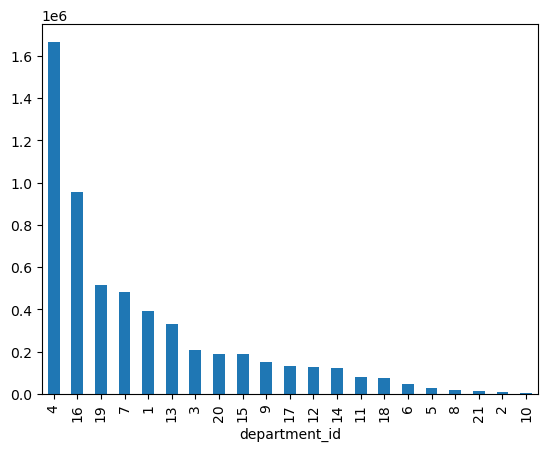

In [71]:
# creating bar chart of northeast department orders
bar10 = df_Northeast['department_id'].value_counts().plot.bar()

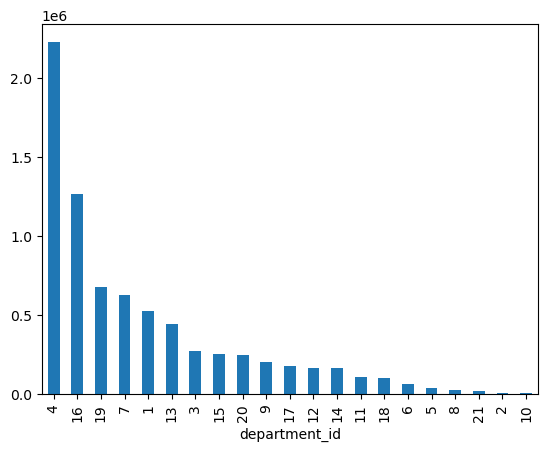

In [72]:
# creating bar chart of midwest department orders
bar11 = df_Midwest['department_id'].value_counts().plot.bar()

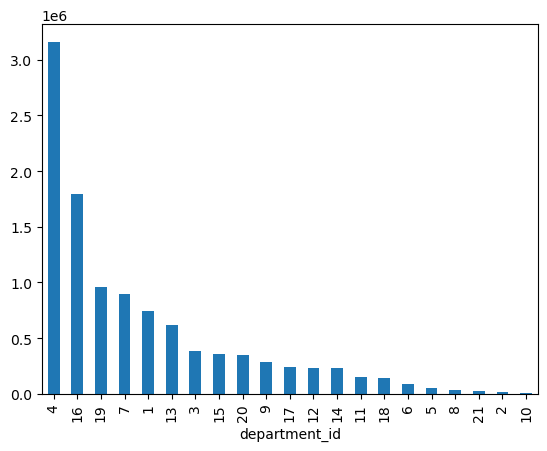

In [73]:
# creating bar chart of South department orders
bar12 = df_South['department_id'].value_counts().plot.bar()

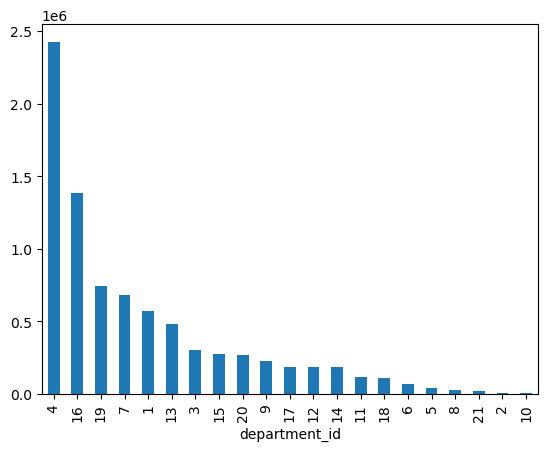

In [74]:
# creating bar chart of West department orders
bar13 = df_West['department_id'].value_counts().plot.bar()

In [74]:
# Export data to pkl

In [75]:
df_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_region.pkl'))

In [76]:
# Export data to pkl
df_complete.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Final_full_combined.pkl'))

MemoryError: 

In [77]:
# Exporting visualizations

In [78]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Young_adult_TOD.png'))

In [79]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Young_adult_dept_ID.png'))

In [81]:
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Young_adult_prices.png'))

In [82]:
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Adult_TOD.png'))

In [83]:
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Adult_Dept_ID.png'))

In [85]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Adult_prices.png'))

In [86]:
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Senior_TOD.png'))

In [87]:
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Senior_Dept_ID.png'))

In [89]:
hist3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Senior_prices.png'))

In [90]:
bar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Northeast_DEP_ID.png'))

In [91]:
bar11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Midwest_DEP_ID.png'))

In [92]:
bar12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'South_DEP_ID.png'))

In [93]:
bar13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'West_DEP_ID.png'))